In [1]:
import os, torch, torchvision, imageio, shutil
import matplotlib.pyplot as plt, numpy as np

def create_dir(path):
    if not os.path.exists(path):
        os.mkdir(path)
    
create_dir('./data/')
create_dir('./data/STL10/')

data_train = torchvision.datasets.STL10('/files/', split='train', download=True,
                                 transform=torchvision.transforms.Compose([ ]))

data_test = torchvision.datasets.STL10('/files/', split='test', download=True,
                                 transform=torchvision.transforms.Compose([ ]))

def data_ablation(image_x,RGB_value):
    if RGB_value == 'R/':
        image_x = np.array(image_x)
        image_x[:,:,0] = 0
        return image_x
    if RGB_value == 'G/':
        image_x = np.array(image_x)
        image_x[:,:,1] = 0
        return image_x
    if RGB_value == 'B/':
        image_x = np.array(image_x)
        image_x[:,:,2] = 0
        return image_x

for iter_folder in ['R/', 'G/', 'B/']:
    folderlocation = './data/STL10/' + iter_folder
    
    create_dir(folderlocation)
    create_dir(folderlocation + 'train/')
    create_dir(folderlocation + 'valid/')
    create_dir(folderlocation + 'test/')

    for iter1 in range(10):    # 10 = number of classes
        create_dir(folderlocation + 'train/'+str(iter1))
        create_dir(folderlocation + 'valid/'+str(iter1))
        create_dir(folderlocation + 'test/'+str(iter1))

    for iter1 in range(len(data_train)):
        image, a = data_train[iter1] 
        
        x= data_ablation(image, iter_folder)
        if iter1%10 ==0:
            imageio.imwrite(folderlocation + 'valid/'+str(a)+'/valid'+str(iter1)+'.png', x)
        else:
            imageio.imwrite(folderlocation + 'train/'+str(a)+'/train'+str(iter1)+'.png', x)

    for iter1 in range(len(data_test)):
        image, a = data_test[iter1] 
        
        x= data_ablation(image, iter_folder)
        imageio.imwrite(folderlocation + 'test/'+str(a)+'/test'+str(iter1)+'.png', x)

100%|██████████| 2640397119/2640397119 [07:46<00:00, 5655258.15it/s]


Extracting /files/stl10_binary.tar.gz to /files/
Files already downloaded and verified


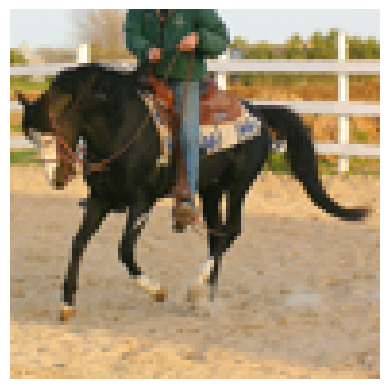

In [2]:
x, a = data_test[0] 
plt.axis('off')
plt.imshow(x)

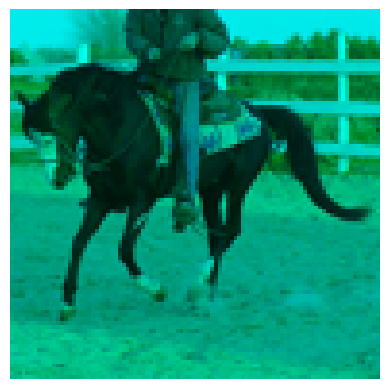

In [3]:
x= np.array(x)
x[:,:,0] = 0
plt.axis('off')
plt.imshow(x)

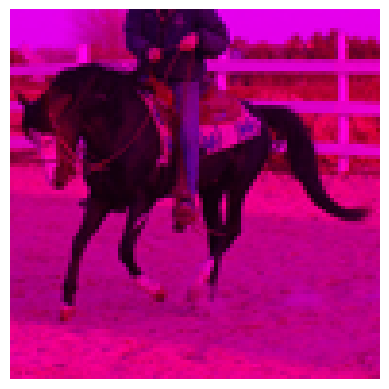

In [4]:
x, a = data_test[0] 
plt.axis('off')
plt.imshow(x)

x= np.array(x)
x[:,:,1] = 0

plt.imshow(x)

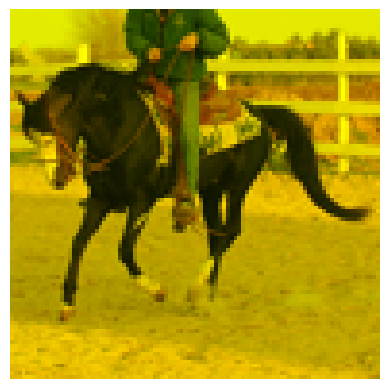

In [5]:
x, a = data_test[0] 
plt.axis('off')
plt.imshow(x)

x= np.array(x)
x[:,:,2] = 0

plt.imshow(x)

In [6]:
shutil.make_archive('Ablation_data_STL10', 'zip', './data/STL10/')
shutil.rmtree('./data/STL10/')